## Analyzing M&A Transactions for Anomalies and Trends
Problem Statement
Given a large dataset of Mergers & Acquisitions (M&A) transactions, the goal is to:

1. Identify outliers in deal values based on historical trends.

2. Detect patterns in industry-wise acquisition activity.

3. Flag anomalous transactions (e.g., unusually high/low valuations relative to past trends).

In [44]:
# import necesasry libraries
import os
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore




In [ ]:
# Load sample M&A transaction data

directory = "C:/Users/**/Downloads"

tran_file = glob(os.path.join(directory, 'ma*.txt'))

df = pd.read_csv(tran_file[0])

df.head()


,deal_id,acquirer,target,industry,deal_value,date
0,101,Apple,CompanyA,Technology,500000000,2023-01-15
1,102,Google,CompanyB,Technology,750000000,2023-02-20
2,103,Microsoft,CompanyC,Technology,400000000,2023-03-10
3,104,Amazon,CompanyD,Retail,600000000,2023-04-05
4,105,Walmart,CompanyE,Retail,300000000,2023-05-12


In [46]:
# Convert date column to datetime

df['date']  = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   deal_id     20 non-null     int64         
 1   acquirer    20 non-null     object        
 2   target      20 non-null     object        
 3   industry    20 non-null     object        
 4   deal_value  20 non-null     int64         
 5   date        20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.1+ KB


In [47]:
# Compute Z-score within each industry

df['z_score'] = df.groupby('industry')['deal_value'].transform(zscore)
df['z_score']

0    -0.687752
1    -0.332018
2    -0.830046
3    -0.116248
4    -1.162476
5     0.662754
6    -0.126239
7     0.000000
8    -0.392232
9     0.347157
10    2.158120
11   -1.000000
12    1.000000
13   -0.047431
14   -1.176697
15   -0.260872
16    0.978351
17    1.278724
18    1.568929
19   -1.862023
Name: z_score, dtype: float64

count    2.000000e+01
mean    -6.661338e-17
std      1.025978e+00
min     -1.862023e+00
25%     -7.233258e-01
50%     -1.212433e-01
75%      7.416534e-01
max      2.158120e+00
Name: z_score, dtype: float64


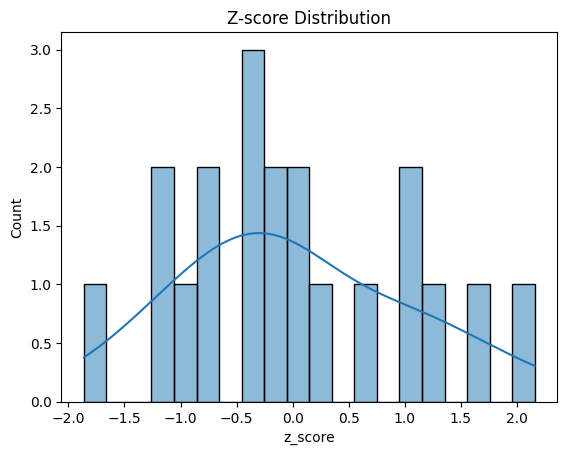

In [48]:
# Check Z-score Distribution
print(df['z_score'].describe())
sns.histplot(df['z_score'], bins=20, kde=True)
plt.title("Z-score Distribution")
plt.show()

Since all Z-scores are within ±2, it means:

1. There are no extreme outliers based on the standard Z-score method.

2. The data is well-distributed, meaning no deal value is significantly different from the industry mean.

3. Using a threshold of 3 is too strict for this dataset.

In [49]:
# Filter outliers (Z-score > 2 or < -2)
outliers = df[np.abs(df['z_score']) > 2]

In [50]:
# Display outliers
print("Outlier Transactions:")
print(outliers[['deal_id', 'acquirer', 'target', 'deal_value', 'industry', 'z_score']])

Outlier Transactions:
    deal_id  acquirer    target  deal_value    industry  z_score
10      111  Facebook  CompanyK  2500000000  Technology  2.15812


In [51]:
# Industry-wise trend analysis (Rolling average of deal value per industry)
df['year'] = df['date'].dt.year
industry_trends = df.groupby(['industry', 'year'])['deal_value'].mean().reset_index()

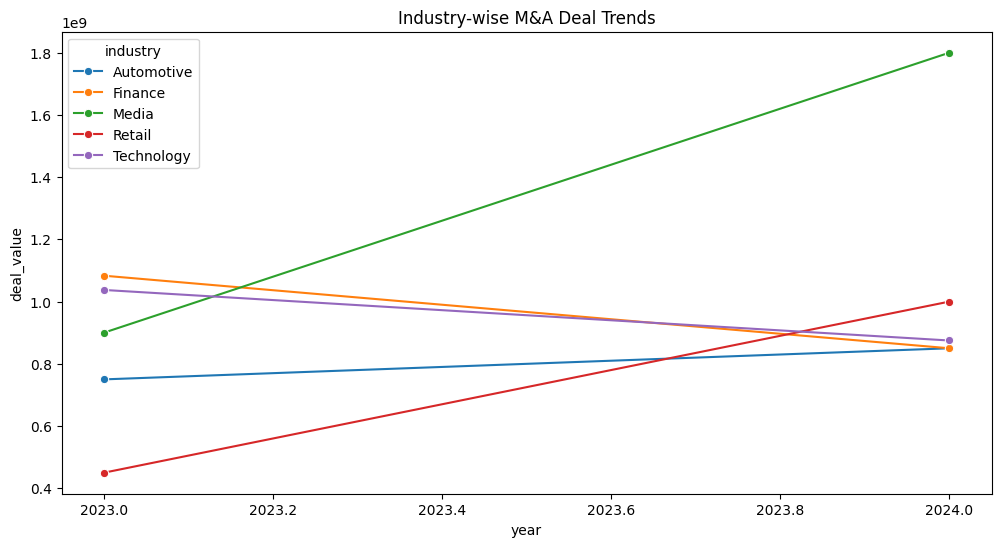

In [52]:
# Plot Industry-wise trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=industry_trends, x='year', y='deal_value', hue='industry', marker='o')
plt.title("Industry-wise M&A Deal Trends")
plt.show()